In [2]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd

In [3]:
alien_df = pd.read_csv('../project-1-alien-analysis/alien_region.csv') 
alien_df

/Users/mecross/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year,region
0,0,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,Midwest
1,1,10/10/1998 13:15,elgin,il,us,cylinder,1800,30 +/- min,While looking up at sky I noticed a bright lig...,11/1/1998,42.037222,-88.281111,10,10,13:15,1998,Midwest
2,2,10/10/2004 15:00,rock island,il,us,sphere,3600,1 hour,The sky was clear and the objects at times ap...,10/27/2004,41.509444,-90.578611,10,10,15:00,2004,Midwest
3,3,10/10/2010 20:45,sterling,il,us,cylinder,600,10min,It had rows of white lights with red lights pu...,11/21/2010,41.788611,-89.696111,10,10,20:45,2010,Midwest
4,4,10/10/2012 20:30,marion,il,us,light,240,2 to 4 minutes,I was leaving my friend&#39s house to go home....,10/30/2012,37.730556,-88.933056,10,10,20:30,2012,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60316,60316,6/15/2011 20:19,georgetown,dc,us,disk,6,6 seconds,metallic disk hovering silent in crowded airsp...,6/20/2011,38.904722,-77.062778,6,15,20:19,2011,South
60317,60317,7/25/2012 21:30,washington,dc,us,changing,900,10-15 minutes,3 objects in 15 minutes&#44 2 balls of light m...,8/19/2012,38.895000,-77.036667,7,25,21:30,2012,South
60318,60318,7/4/2012 21:06,washington,dc,us,sphere,5.5,5.5 seconds,Luminous spheres in flight&#44 then suddenly v...,8/5/2012,38.895000,-77.036667,7,4,21:06,2012,South
60319,60319,8/28/2010 22:06,washington,dc,us,fireball,120,2 minutes,Red flaming object flying low over Washington ...,8/30/2010,38.895000,-77.036667,8,28,22:06,2010,South


In [4]:
#Clean datetime column data 

date_time = pd.to_datetime(alien_df[['Year', 'Month', 'Day']])

alien_df['Datetime_clean'] = date_time

alien_df.head()


,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year,region,Datetime_clean
0,0,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,Midwest,1993-10-10
1,1,10/10/1998 13:15,elgin,il,us,cylinder,1800,30 +/- min,While looking up at sky I noticed a bright lig...,11/1/1998,42.037222,-88.281111,10,10,13:15,1998,Midwest,1998-10-10
2,2,10/10/2004 15:00,rock island,il,us,sphere,3600,1 hour,The sky was clear and the objects at times ap...,10/27/2004,41.509444,-90.578611,10,10,15:00,2004,Midwest,2004-10-10
3,3,10/10/2010 20:45,sterling,il,us,cylinder,600,10min,It had rows of white lights with red lights pu...,11/21/2010,41.788611,-89.696111,10,10,20:45,2010,Midwest,2010-10-10
4,4,10/10/2012 20:30,marion,il,us,light,240,2 to 4 minutes,I was leaving my friend&#39s house to go home....,10/30/2012,37.730556,-88.933056,10,10,20:30,2012,Midwest,2012-10-10


In [5]:
#Make index column for datetime to date 

alien_df['week_day_index'] = alien_df['Datetime_clean'].dt.dayofweek

alien_df.head()
    
#Assign week_day_index to day of the week 

week_day = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday',
    }

alien_df['week_day_name'] = ''
for index, row in alien_df.iterrows():
    week_indx = row['week_day_index']
    alien_df.loc[index, 'week_day_name'] = week_day[week_indx]

alien_df.head()



,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year,region,Datetime_clean,week_day_index,week_day_name
0,0,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,Midwest,1993-10-10,6,Sunday
1,1,10/10/1998 13:15,elgin,il,us,cylinder,1800,30 +/- min,While looking up at sky I noticed a bright lig...,11/1/1998,42.037222,-88.281111,10,10,13:15,1998,Midwest,1998-10-10,5,Saturday
2,2,10/10/2004 15:00,rock island,il,us,sphere,3600,1 hour,The sky was clear and the objects at times ap...,10/27/2004,41.509444,-90.578611,10,10,15:00,2004,Midwest,2004-10-10,6,Sunday
3,3,10/10/2010 20:45,sterling,il,us,cylinder,600,10min,It had rows of white lights with red lights pu...,11/21/2010,41.788611,-89.696111,10,10,20:45,2010,Midwest,2010-10-10,6,Sunday
4,4,10/10/2012 20:30,marion,il,us,light,240,2 to 4 minutes,I was leaving my friend&#39s house to go home....,10/30/2012,37.730556,-88.933056,10,10,20:30,2012,Midwest,2012-10-10,2,Wednesday


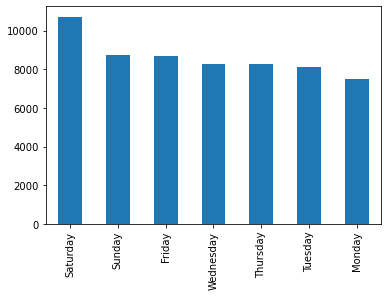

In [9]:
#Chart of count of sightings by day 

alien_df['week_day_name'].value_counts().plot.bar()

#Formatting for reference
# shape_df.plot(kind='bar', color='g', figsize=(20,16), fontsize=20)

# plt.xlabel("UFO Shapes Sighted", fontsize=26)
# plt.ylabel("Count of each Shape Sighted", fontsize=26)
# plt.title("Count of UFO Sightings by Shape Type", fontsize=26)

# plt.minorticks_on()
# plt.grid()
# plt.legend(fontsize=26)

In [29]:
#New DF to sort days 

weekday_df = alien_df.loc[:,['week_day_index', 'week_day_name']]
weekday_df.sort_values(by=['week_day_index'], axis=0, ascending=True)
weekday_df['week_day_name'].value_counts()


Saturday     10713
Sunday        8743
Friday        8701
Wednesday     8283
Thursday      8277
Tuesday       8097
Monday        7507
Name: week_day_name, dtype: int64

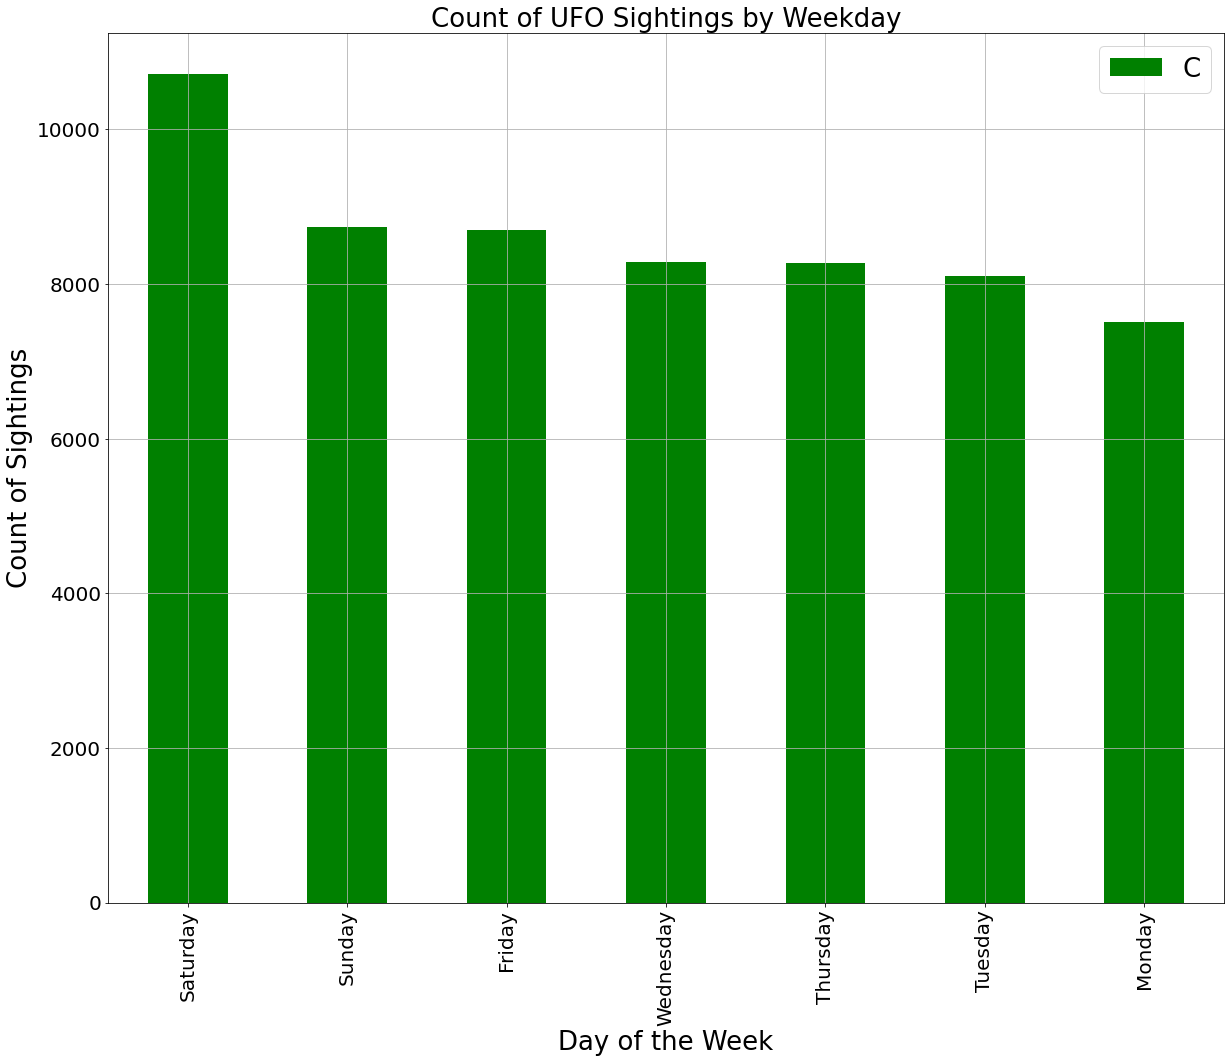

In [28]:
weekday_df['week_day_name'].value_counts().plot(kind='bar', color='g', figsize=(20,16), fontsize=20)

plt.xlabel("Day of the Week", fontsize=26)
plt.ylabel("Count of Sightings", fontsize=26)
plt.title("Count of UFO Sightings by Weekday", fontsize=26)

#plt.minorticks_on()
plt.grid()
plt.legend(fontsize=26, labels='Count')

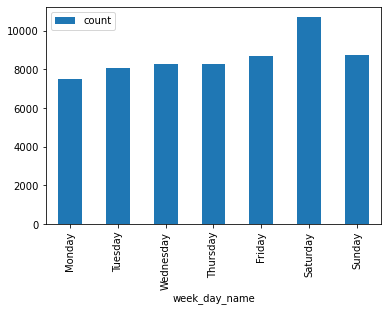

In [34]:
#Reorder by day of the week 

weekday_reorder = alien_df['week_day_name'].value_counts().reset_index()
weekday_reorder.columns = ['week_day_name', 'count']
#print(weekday_reorder)

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = weekday_reorder['week_day_name'].map(mapping)
#print(key)

weekday_reorder = weekday_reorder.iloc[key.argsort()].set_index('week_day_name')


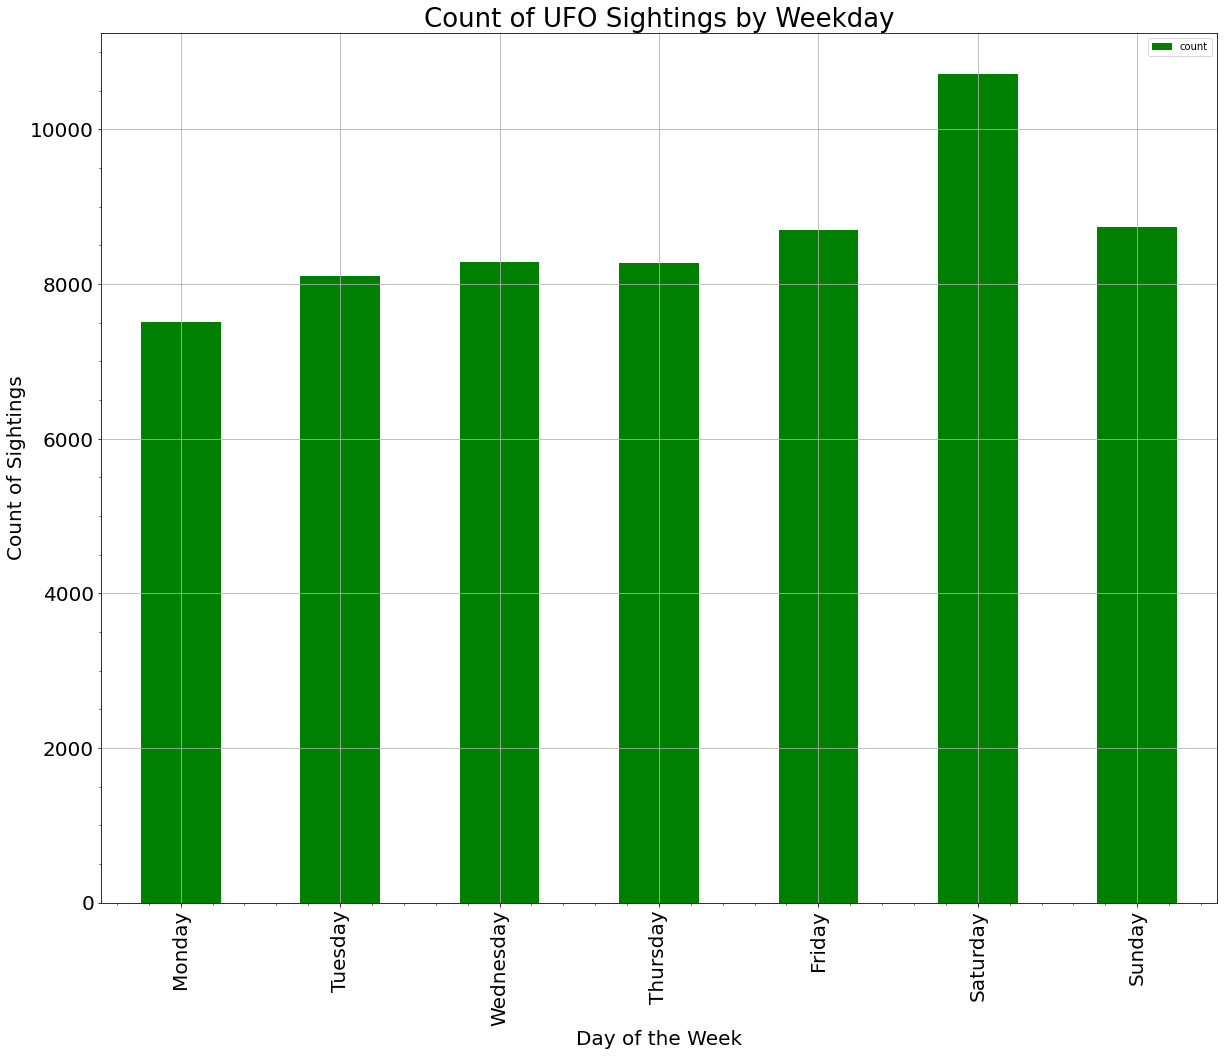

In [41]:
#Chart reordered by weekday

weekday_reorder.plot(kind='bar', color='g', figsize=(20,16), fontsize=20)

plt.xlabel("Day of the Week", fontsize=20)
plt.ylabel("Count of Sightings", fontsize=20)
plt.title("Count of UFO Sightings by Weekday", fontsize=26)

plt.minorticks_on()
plt.grid()

plt.savefig("Count of UFO Sightings by Weekday")